In [1]:
from cpnLES_MSCARTlib import POLCARTdset
from cpnRetrievalslib import Bispec_LUT
import cpnCommonlib as cpn
import matplotlib.pyplot as plt
cpn.setup_figures(plt)


In [2]:
#Old LUTs
SZA=120
LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
                   'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(180-int(SZA)))
LUT.readLUT()

### Sanity check with previous LUTs

In [20]:
#testing microphysics computations
testm2=POLCARTdset('cfree',nmldpath='b0p860_fields/')
testm2.readMSCARTplus('testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b0p860/',clm=True,step=True)
testm2.remove_redundant_nadir()
testmS=POLCARTdset('cfree',nmldpath='b2p13_fields/')
testmS.readMSCARTplus('testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b2p13/',clm=True,step=True)
testmS.remove_redundant_nadir()

testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file
testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file


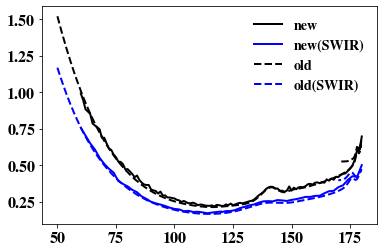

In [21]:
plt.plot(testm2.ScatA,testm2.MeanPRad[:,0],'k',label='new')
plt.plot(testmS.ScatA,testmS.MeanPRad[:,0],'b',label='new(SWIR)')
plt.plot(LUT.scat,LUT.I[0,57,4,21,:],'k--',label='old')#LUT.I(band,COT,ve,re,scatA)
plt.plot(LUT.scat,LUT.I[1,57,4,21,:],'b--',label='old(SWIR)')#LUT.I(band,COT,ve,re,scatA)
plt.legend()

## Setting up field files to MSCART

- Use field_file_MSCART.py

## Writing fieldfile name list

In [41]:
import os

band = 1# 0-0.470, 1-0.86, 2-2.13
bnd = {0:'0p470',1:'0p860',2:'2p13'}
ouP = './b'+bnd[band]+'_fields/'

LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
               'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(60))
LUT.readLUT()

new_re=np.concatenate([np.array(LUT.re),np.array((LUT.re[1:]+LUT.re[0:-1])/2)])
new_re.sort()
new_re=np.unique(new_re.round(2))
new_tau=np.concatenate([np.array(LUT.tau),np.array((LUT.tau[1:]+LUT.tau[0:-1])/2)])
new_tau.sort()
new_tau=np.unique(new_tau.round(2))

re_list = new_re#np.unique(LUT.re.round(2))
cot_list = new_tau #np.unique(LUT.tau.round(2))
ve = 0.05
fname_list=["" for x in np.arange(re_list.size*cot_list.size)]
i=0
for re in re_list:
    for COT in cot_list:
        jobid='LUT'+bnd[band]+'_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)
        fname_list[i] = jobid.replace('.','p')
        i+=1
fname_list=np.array(fname_list)
fname = 'LUT'+bnd[band]+('_ve%0.2frexCOTx'%(ve)).replace('.','p')+'.dat'
if not os.path.exists(fname):
    np.savetxt('LUT'+bnd[band]+('_ve%0.2frexCOTx'%(ve)).replace('.','p')+'.dat',fname_list,fmt="%s")
else:
    print("File already exists!")

## Collecting and setting up the LUT

LUT0p860_ve0p05re3p50COT50p12SZA120_SAA000_VAA000plus_NPH1e4.nc is a single batch file


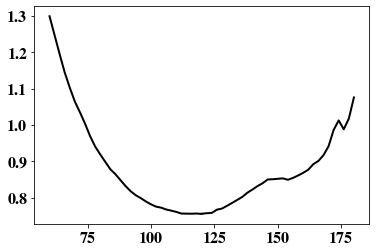

In [43]:
#Checking a single run
test=POLCARTdset('cfree',nmldpath='b0p860_fields/')
test.readMSCARTplus('LUT0p860_ve0p05re3p50COT50p12SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b0p860/',clm=True,step=True)
test.remove_redundant_nadir()
plt.plot(test.ScatA,test.MeanPRad[:,0],'k',label='new')

In [175]:
LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
               'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(60))
LUT.readLUT()

new_re=np.concatenate([np.array(LUT.re),np.array((LUT.re[1:]+LUT.re[0:-1])/2)])
new_re.sort()
new_re=np.unique(new_re.round(2))
new_tau=np.concatenate([np.array(LUT.tau),np.array((LUT.tau[1:]+LUT.tau[0:-1])/2)])
new_tau.sort()
new_tau=np.unique(new_tau.round(2))

ve = 0.05
COT = 4.03
re = 16.00

VNIR=POLCARTdset('radx',nmldpath='b0p860_fields/')
VNIR.readMSCARTplus(('LUT0p860_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b0p860/',clm=True,step=True)
VNIR.remove_redundant_nadir()
SWIR=POLCARTdset('radx',nmldpath='b2p13_fields/')
SWIR.readMSCARTplus(('LUT2p13_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b2p13/',clm=True,step=True)
SWIR.remove_redundant_nadir()
#plt.plot(test.ScatA,test.MeanPRad[:,0],'k',label='new')

LUT0p860_ve0p05re16p00COT4p03SZA120_SAA000_VAA000plus_NPH1e4.nc is a single batch file
LUT2p13_ve0p05re16p00COT4p03SZA120_SAA000_VAA000plus_NPH1e4.nc is a single batch file


In [72]:
vars(LUT).keys()

dict_keys(['fdpath', 'fname', 'band', 're', 've', 'tau', 'mu0', 'phi', 'mu', 'scat', 'I', 'Q', 'U'])

In [ ]:
LUTnew=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LUTs/using_MSCART','LESLUT_highres_SZA120_nadir.nc')
LUTnew.band=np.array([0.860,2.13])
LUTnew.re = new_re
LUTnew.ve = ve
LUTnew.tau = new_tau
LUTnew.mu0 = np.cos(np.deg2rad(60))
LUTnew.phi = 0.0
LUTnew.mu = 1.0
LUTnew.scat = 119.99
RI = np.zeros((2,new_tau.size,new_re.size),dtype=float)
noboth=0
i = 0
for re in LUTnew.re:
    j=0
    for COT in LUTnew.tau:
        file0p86 = ('LUT0p860_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc'
        file2p13 = ('LUT2p13_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc'
        if os.path.exists('results/b0p860/'+file0p86) and os.path.exists('results/b2p13/'+file2p13):
            VNIR=POLCARTdset('radx',nmldpath='b0p860_fields/')
            VNIR.readMSCARTplus(file0p86,fdpath='results/b0p860/',clm=True,step=True)
            VNIR.remove_redundant_nadir()
            RI[0,j,i] = VNIR.MeanPRad[31,0]
            SWIR=POLCARTdset('radx',nmldpath='b2p13_fields/')
            SWIR.readMSCARTplus(file2p13,fdpath='results/b2p13/',clm=True,step=True)
            SWIR.remove_redundant_nadir()
            RI[1,j,i] = SWIR.MeanPRad[31,0]
        else:
            noboth+=1
        j+=1
    i+=1
print(noboth)

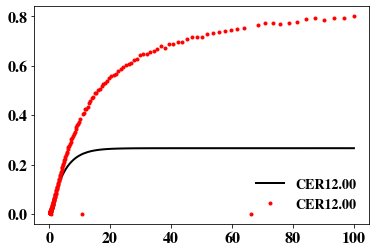

In [172]:
# Comparing with previous LUTs (VNIR band)
# Seems like not enough photons
plt.plot(LUT.tau,LUT.I[1,:,4,20,149],'k',label='CER%0.2f'%(LUT.re[20]))
plt.plot(new_tau,RI[0,:,40],'r.',label="CER%0.2f"%(LUTnew.re[40]))
plt.legend()

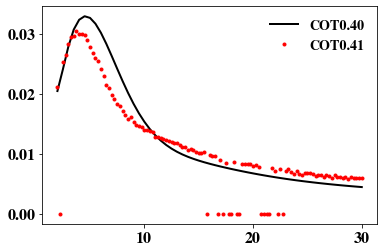

In [173]:
# Comparing with previous LUTs (SWIR band)
# Seems like not enough photons had been used
plt.plot(LUT.re,LUT.I[2,20,4,:,149],'k',label='COT%0.2f'%(LUT.tau[20]))
plt.plot(new_re,RI[1,29,:],'r.',label="COT%0.2f"%(LUTnew.tau[29]))
plt.legend()